In [1]:
'''
A dataset collected in a cosmetics shop showing details of customers and whether or not they responded to a 
special offer to buy a new lip-stick is shown in table below. Use this dataset to build a decision tree, with 
Buys as the target variable, to help in buying lip-sticks in the future. Find the root node of decision tree. 
According to the decision tree you have made from previous training data set, 
what is the decision for the test data: [Age < 21, Income = Low, Gender = Female, Marital Status = Married]?
'''

'\nA dataset collected in a cosmetics shop showing details of customers and whether or not they responded to a \nspecial offer to buy a new lip-stick is shown in table below. Use this dataset to build a decision tree, with \nBuys as the target variable, to help in buying lip-sticks in the future. Find the root node of decision tree. \nAccording to the decision tree you have made from previous training data set, \nwhat is the decision for the test data: [Age < 21, Income = Low, Gender = Female, Marital Status = Married]?\n'

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [18]:
data = pd.read_csv("DecisionTree.csv")
data

,Age,Income,Gender,Marital Status,Buys,Unnamed: 5
0,<21,High,Male,Single,No,NaN
1,<21,High,Male,Married,No,NaN
2,21-35,High,Male,Single,Yes,NaN
3,>35,Medium,Male,Single,Yes,NaN
4,>35,Low,Female,Single,Yes,NaN
5,>35,Low,Female,Married,No,NaN
6,21-35,Low,Female,Married,Yes,NaN
7,<21,Medium,Male,Single,No,NaN
8,<21,Low,Female,Married,Yes,NaN
9,>35,Medium,Female,Single,Yes,NaN


In [20]:
cleanup_nums = {
    "Age": {
        "<21": 0,
        "21-35": 1,
        ">35": 2
    },
    "Income":{
        "Low": 0,
        "Medium": 1,
        "High": 2
    },
    "Gender":{
        "Male": 0,
        "Female": 1
    },
    "Marital Status":{
        "Single": 0,
        "Married": 1
    },
    "Buys":{
        "Yes": 1,
        "No": 0
    }
}
data.replace(cleanup_nums, inplace=True)

In [43]:
X = data[['Age', 'Income', 'Gender', 'Marital Status']]
Y = data[['Buys']]

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0)
X_train

,Age,Income,Gender,Marital Status
7,0,1,0,0
2,1,2,0,0
9,2,1,1,0
6,1,0,1,1
4,2,0,1,0
13,2,1,0,1
10,0,1,1,1
0,0,2,0,0
11,1,1,0,1
5,2,0,1,1


In [45]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)

In [46]:
print("Accuracy : ", metrics.accuracy_score(Y_train, Y_pred))

Accuracy :  1.0


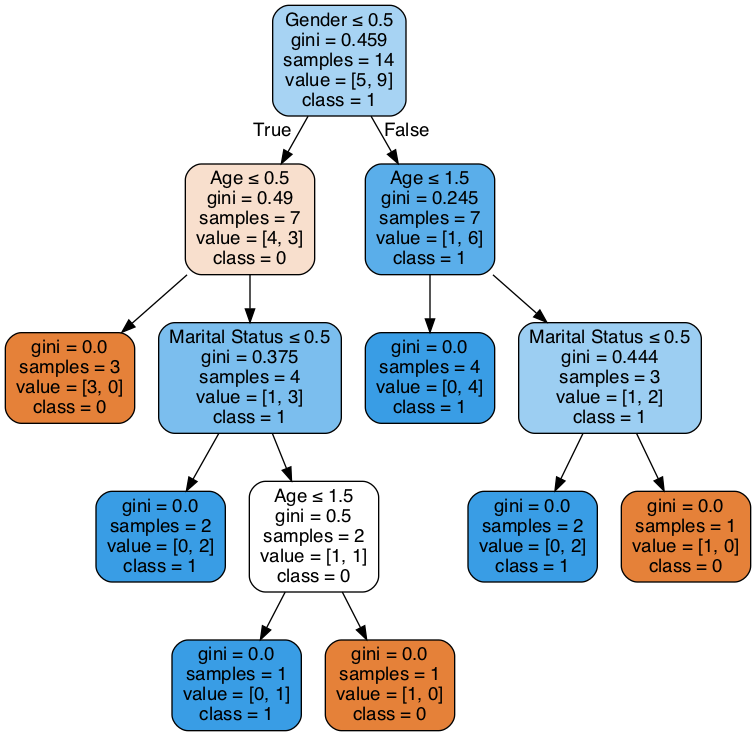

In [47]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled=True, rounded=True, special_characters=True, feature_names = ['Age', 'Income', 'Gender', 'Marital Status'], class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('buys.png')
Image(graph.create_png())

In [48]:
# TEST data:

#value = {"Age": "< 21", "Income" = "Low", "Gender" = "Female", "Marital Status" = "Married"}

test_age = int(input("Enter 0 for <21, 1 for 21-35, and 2 for >35: "))
test_income = int(input("Enter 0 for Low, 1 for Medium, 2 for High: "))
test_gender = int(input("Enter 0 for Male, and 1 for Female: "))
test_marital_status = int(input("Enter 0 for Single, and 1 for Married: "))

test_data = [[test_age, test_income, test_gender, test_marital_status]]

prediction = clf.predict(test_data)

if(prediction[0] == 1):
    print("The person will buy the lipstick! :)")
else:
    print("The person will likely not buy the lipstick. :(")


Enter 0 for <21, 1 for 21-35, and 2 for >35: 0
Enter 0 for Low, 1 for Medium, 2 for High: 0
Enter 0 for Male, and 1 for Female: 1
Enter 0 for Single, and 1 for Married: 1
The person will buy the lipstick! :)
